# Outliers Detection

Prendo una classe e verifico se per quella classe tutte le navi si comportano allo stesso modo.

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import scipy

df = pd.read_csv('source/dataset_60.csv')
df.head()

,Unnamed: 0,class,course,speed,row,column,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,target,next_status_60_column,next_status_60_row
0,0,0.0,0.571429,0.666667,0.936340,0.78750,0.000000,1.000000,-0.899631,0.436651,-0.866025,0.5,675,129.0,340.0
1,1,0.0,0.571429,0.666667,0.936340,0.78750,0.000000,1.000000,-0.899631,0.436651,-0.866025,0.5,675,129.0,340.0
2,2,0.0,0.571429,0.666667,0.925729,0.79375,0.000000,1.000000,-0.899631,0.436651,-0.866025,0.5,675,129.0,340.0
3,3,0.0,0.571429,0.333333,0.907162,0.80000,0.000000,1.000000,-0.899631,0.436651,-0.866025,0.5,794,128.0,342.0
4,4,0.0,0.000000,0.333333,0.901857,0.80625,0.258819,0.965926,-0.899631,0.436651,-0.866025,0.5,1110,127.0,348.0


Number of classes

In [2]:
len(df.target.unique())

2586

In [17]:
dft = df

In [18]:
target = 0

dft = df[df['target'] == target]
dft.head()

,Unnamed: 0,class,course,speed,row,column,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,target,next_status_60_column,next_status_60_row
2828,2828,1.0,1.0,0.0,0.856764,0.95,-0.500000,-0.866025,0.693281,-0.720667,0.5,-0.866025,0,152.0,323.0
2829,2829,1.0,1.0,0.0,0.856764,0.95,-0.707107,-0.707107,0.693281,-0.720667,0.5,-0.866025,0,152.0,323.0
2830,2830,1.0,1.0,0.0,0.856764,0.95,-0.707107,-0.707107,0.693281,-0.720667,0.5,-0.866025,0,152.0,323.0
2831,2831,1.0,1.0,0.0,0.856764,0.95,-0.707107,-0.707107,0.693281,-0.720667,0.5,-0.866025,0,152.0,323.0
2832,2832,1.0,1.0,0.0,0.856764,0.95,-0.707107,-0.707107,0.693281,-0.720667,0.5,-0.866025,0,152.0,323.0


In [19]:
dft.shape

(32310, 15)

In [20]:
X = dft[['class','course','speed','row','column','hour_sin','hour_cos','day_sin','day_cos', 'month_cos','month_sin']]

In [21]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

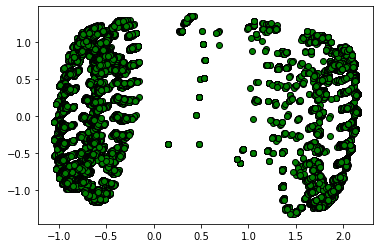

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='black',color='green')
plt.show()

scegliere un tipo di modello per ogni categoria

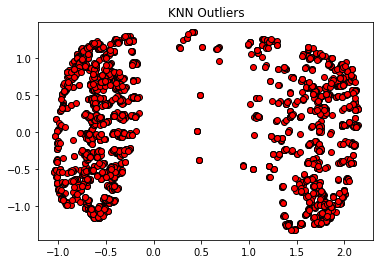

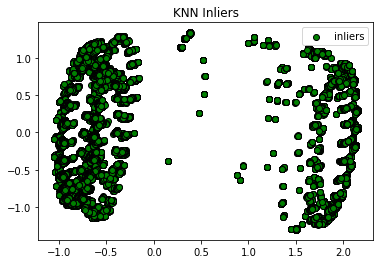

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountere

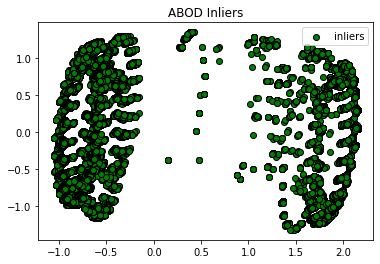

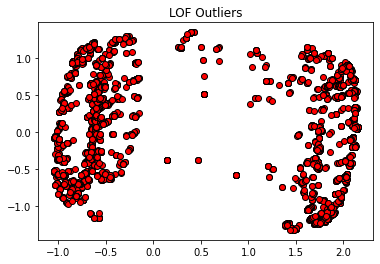

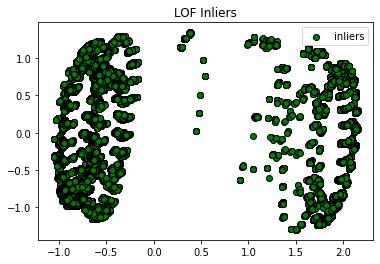

In [23]:
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
from pyod.models.auto_encoder import AutoEncoder
import matplotlib.pyplot as plt

models = {'KNN' : KNN(), 'ABOD' : ABOD(), 'LOF' : LOF()}

for name,model in models.items():
    
    clf = model
    clf.fit(X_pca)
    
    anomaly_score = clf.decision_function(X_pca)
    outliers = clf.predict(X_pca)
    
    
    X_outliers = X_pca[np.where(outliers==1)]
    if len(X_outliers) > 1:

        #X_outliers = scipy.sparse.csr_matrix(X_outliers.values)
    
    

        #pca = PCA(n_components=2)
        #pca.fit(X_outliers.toarray())
        #X_pca_out = pca.transform(X_outliers.toarray())
        
        plt.scatter(X_outliers[:, 0], X_outliers[:, 1], edgecolor='black',color='red', label='outliers')
        plt.title(name + " Outliers")
        plt.show()
        

    X_inliers = X_pca[np.where(outliers==0)]
    #X_inliers = scipy.sparse.csr_matrix(X_inliers.values)

    #pca = PCA(n_components=2)
    #pca.fit(X_inliers.toarray())
    #X_pca_in = pca.transform(X_inliers.toarray())
    
    plt.scatter(X_inliers[:, 0], X_inliers[:, 1], edgecolor='black',color='green', label='inliers')
    plt.title(name + " Inliers")
    plt.legend()
    plt.show()

# Features analysis

Analizzo due features alla volta per vedere se ci sono outliers:

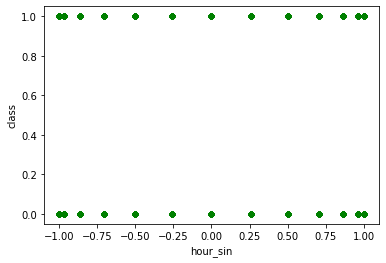

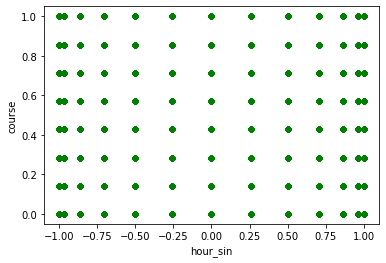

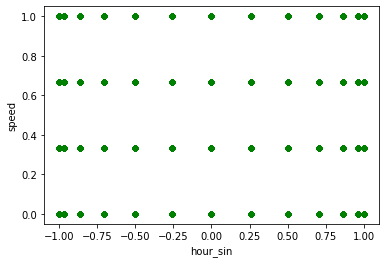

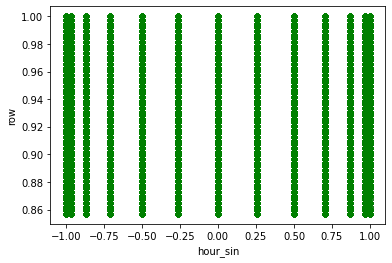

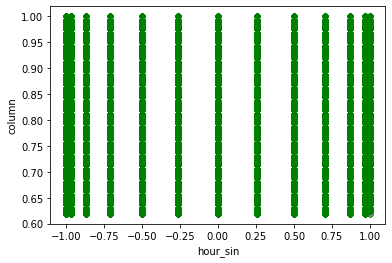

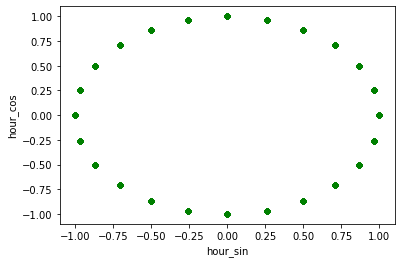

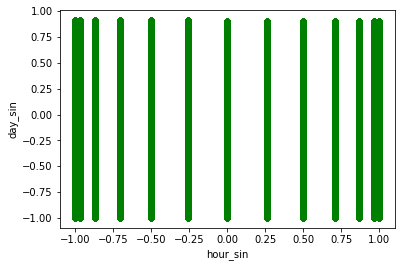

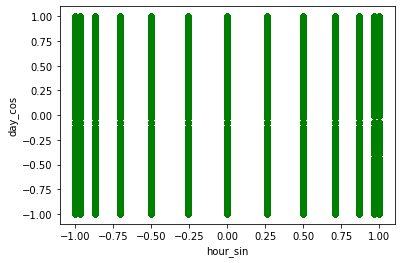

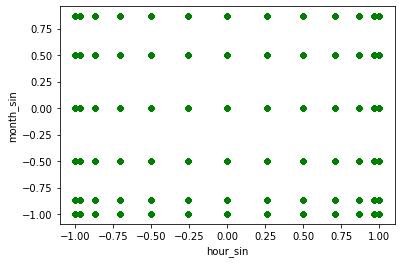

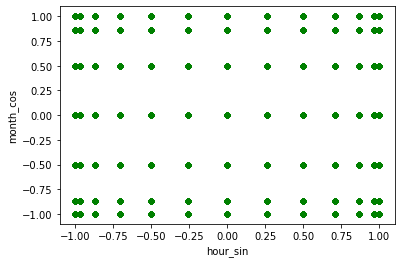

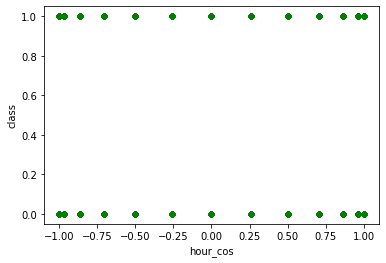

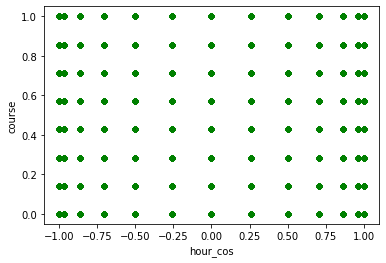

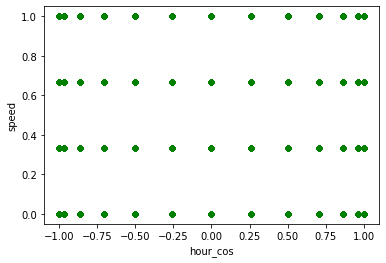

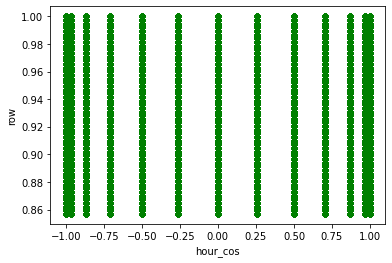

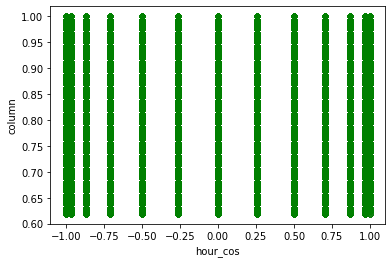

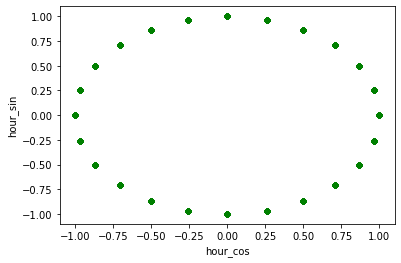

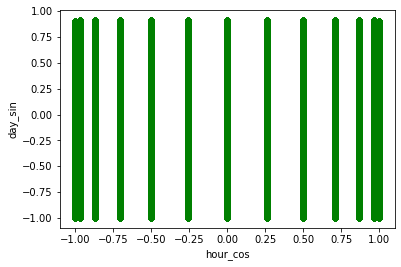

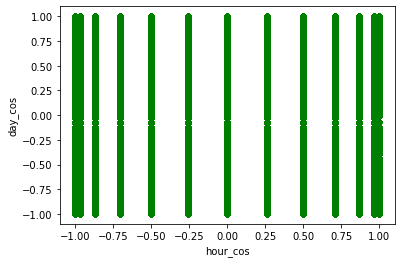

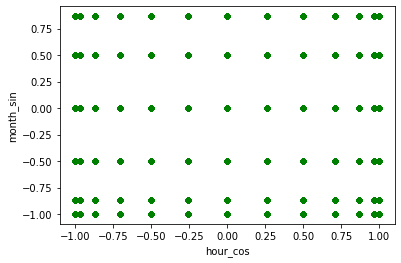

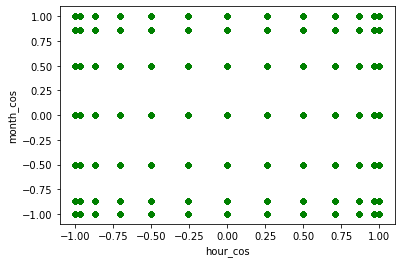

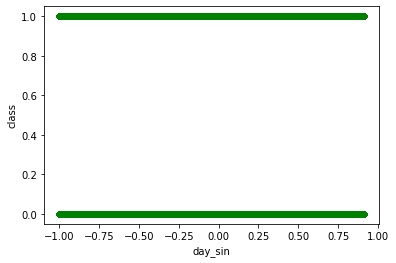

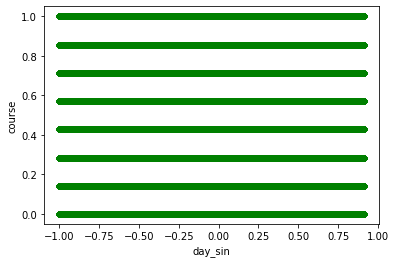

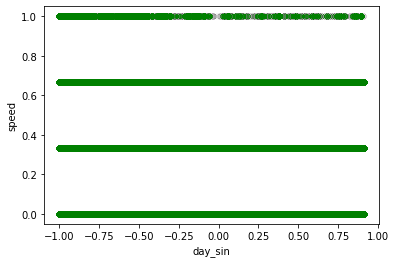

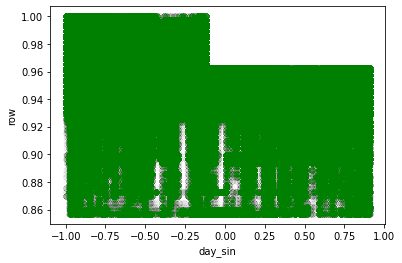

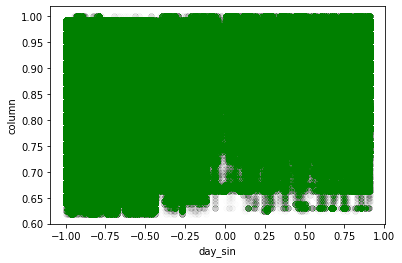

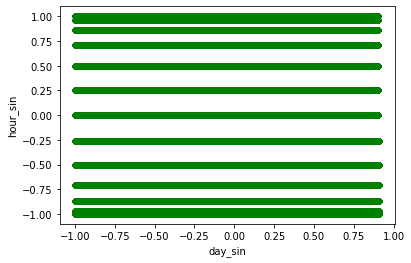

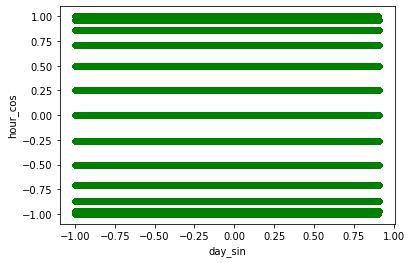

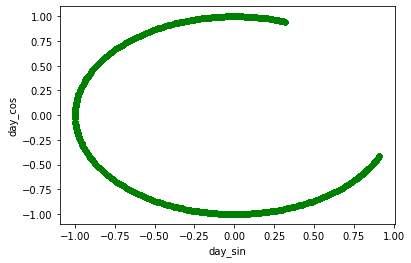

KeyboardInterrupt: 

In [25]:
import matplotlib.pyplot as plt

features1 = ['hour_sin','hour_cos', 'day_sin','day_cos', 'month_sin', 'month_cos']
features2 = ['class','course','speed','row','column','hour_sin','hour_cos', 'day_sin','day_cos', 'month_sin', 'month_cos']

for f1 in features1:
    for f2 in features2:
        if f1 != f2:
            plt.scatter(df[f1], df[f2], color='green', alpha=0.005)
            plt.xlabel(f1)
            plt.ylabel(f2)
            plt.show()

# Outliers detection through clustering (DBSCAN)

In [ ]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(X)
list(clusters).count(-1) # SKLearn labels the noisy points as (-1)

# References
* [5 ways to detect outliers](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)

# Outliers detection through Decision tree (Isolation Forest)

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X)
preds